In [ ]:
#1

try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#2

# Get project files
# Download and extract dataset
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip

# Define paths
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Count the number of images in each directory
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print(f"Total training images: {total_train}")
print(f"Total validation images: {total_val}")
print(f"Total test images: {total_test}")

# Variables for pre-processing and training
BATCH_SIZE = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150



Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/

In [ ]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances with data augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    batch_size=BATCH_SIZE,
    shuffle=False,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    classes=['.']  # Use '.' to indicate test images as a single class
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [ ]:
# 4 (Example Model Architecture)
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# 5 (Example Training with Early Stopping)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    callbacks=[early_stopping]
)




Epoch 1/15
16/16 [==============================] - 136s 8s/step - loss: 0.7977 - accuracy: 0.4835 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 125s 8s/step - loss: 0.6930 - accuracy: 0.5280 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 127s 8s/step - loss: 0.6926 - accuracy: 0.5160 - val_loss: 0.6904 - val_accuracy: 0.5930
Epoch 4/15
16/16 [==============================] - 125s 8s/step - loss: 0.6915 - accuracy: 0.5500 - val_loss: 0.6881 - val_accuracy: 0.5030
Epoch 5/15
16/16 [==============================] - 139s 9s/step - loss: 0.6855 - accuracy: 0.5345 - val_loss: 0.6698 - val_accuracy: 0.5920
Epoch 6/15
16/16 [==============================] - 124s 8s/step - loss: 0.6805 - accuracy: 0.5585 - val_loss: 0.6656 - val_accuracy: 0.5450
Epoch 7/15
16/16 [==============================] - 126s 8s/step - loss: 0.6711 - accuracy: 0.5690 - val_loss: 0.6347 - val_accuracy: 0.6450
Epoch 8/15
16

Found 2000 images belonging to 2 classes.


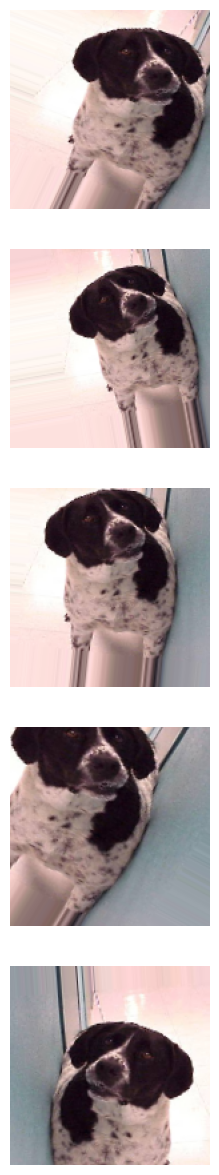

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2, 2),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Fourth convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output of the last convolutional layer
    layers.Flatten(),

    # Fully connected layer with ReLU activation
    layers.Dense(512, activation='relu'),

    # Output layer with a single neuron (sigmoid activation for binary classification)
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',                     # Optimizer
    loss='binary_crossentropy',          # Loss function for binary classification
    metrics=['accuracy']                 # Metrics to monitor
)

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# 8
# Train the model
history = model.fit(
    x=train_data_gen,                   # Training data generator
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,  # Number of batches per epoch
    epochs=10,                          # Number of epochs to train
    validation_data=val_data_gen,       # Validation data generator
    validation_steps=val_data_gen.samples // BATCH_SIZE  # Number of batches for validation
)


Epoch 1/10
15/15 [==============================] - 121s 8s/step - loss: 0.7027 - accuracy: 0.5096 - val_loss: 0.6933 - val_accuracy: 0.4900
Epoch 2/10
15/15 [==============================] - 111s 8s/step - loss: 0.6904 - accuracy: 0.5422 - val_loss: 0.6799 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 127s 8s/step - loss: 0.6803 - accuracy: 0.5529 - val_loss: 0.6823 - val_accuracy: 0.5446
Epoch 4/10
15/15 [==============================] - 117s 8s/step - loss: 0.6910 - accuracy: 0.5096 - val_loss: 0.6700 - val_accuracy: 0.5703
Epoch 5/10
15/15 [==============================] - 118s 8s/step - loss: 0.6612 - accuracy: 0.5988 - val_loss: 0.6600 - val_accuracy: 0.5737
Epoch 6/10
15/15 [==============================] - 120s 8s/step - loss: 0.6539 - accuracy: 0.6099 - val_loss: 0.6393 - val_accuracy: 0.6250
Epoch 7/10
15/15 [==============================] - 117s 8s/step - loss: 0.6544 - accuracy: 0.6004 - val_loss: 0.6681 - val_accuracy: 0.5569
Epoch 8/10
15

Test directory path: cats_and_dogs/test
Contents of test directory:
Found directory: cats_and_dogs/test
File: 17.jpg
File: 36.jpg
File: 22.jpg
File: 19.jpg
File: 15.jpg
File: 37.jpg
File: 41.jpg
File: 12.jpg
File: 2.jpg
File: 6.jpg
File: 40.jpg
File: 21.jpg
File: 5.jpg
File: 30.jpg
File: 7.jpg
File: 48.jpg
File: 25.jpg
File: 9.jpg
File: 20.jpg
File: 32.jpg
File: 38.jpg
File: 34.jpg
File: 11.jpg
File: 47.jpg
File: 14.jpg
File: 26.jpg
File: 44.jpg
File: 1.jpg
File: .DS_Store
File: 31.jpg
File: 50.jpg
File: 10.jpg
File: 46.jpg
File: 49.jpg
File: 3.jpg
File: 13.jpg
File: 39.jpg
File: 24.jpg
File: 27.jpg
File: 29.jpg
File: 16.jpg
File: 45.jpg
File: 18.jpg
File: 35.jpg
File: 42.jpg
File: 43.jpg
File: 23.jpg
File: 28.jpg
File: 33.jpg
File: 4.jpg
File: 8.jpg


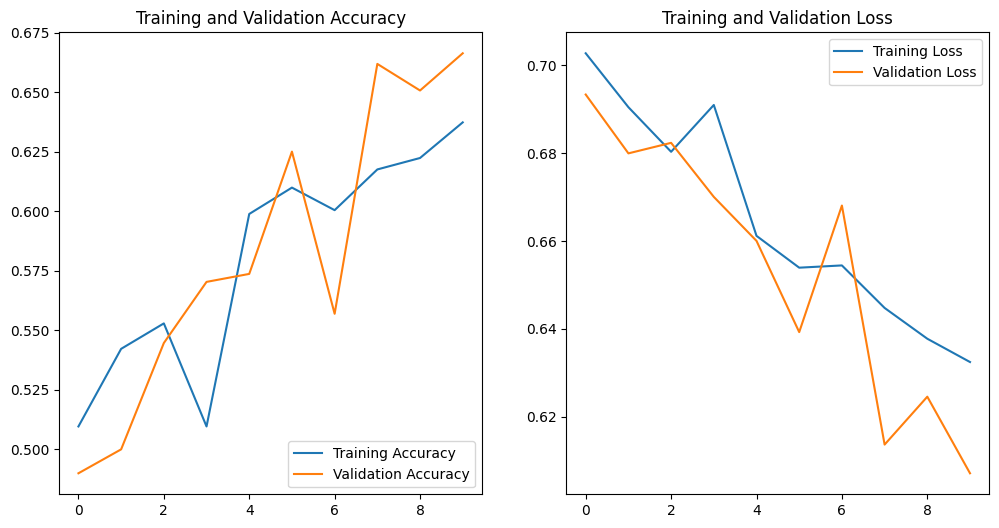

In [ ]:
# 9
import matplotlib.pyplot as plt

# Retrieve metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create epochs_range based on the length of accuracy or loss metrics
epochs_range = range(len(acc))  # Use the length of accuracy as the number of epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


1/1 [==============================] - 1s 898ms/step


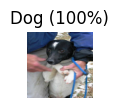

In [ ]:
# 10 (Updated Plotting Function)
import numpy as np
import matplotlib.pyplot as plt

# Predict class probabilities
if test_data_gen.samples > 0:
    test_predictions = model.predict(test_data_gen, steps=np.ceil(test_data_gen.samples / BATCH_SIZE))
    predicted_classes = (test_predictions > 0.5).astype("int32")

    # Reset the test generator and fetch images
    test_data_gen.reset()
    test_images = np.array([test_data_gen.next()[0] for _ in range(test_data_gen.samples // BATCH_SIZE + 1)])
    test_images = test_images[:test_data_gen.samples]

    def plotImages(images, predictions):
        plt.figure(figsize=(10, 10))
        num_images = min(len(images), 50)  # Ensure we don't exceed 50 images
        for i in range(num_images):
            ax = plt.subplot(5, 10, i + 1)
            plt.imshow(images[i])
            title = "Dog" if predictions[i] == 1 else "Cat"
            ax.set_title(f"{title} ({int(predictions[i][0] * 100)}%)")
            plt.axis("off")
        plt.show()

    plotImages(test_images, predicted_classes)
else:
    print("No test images found. Please check your test data directory.")





In [ ]:
# 11
answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
           1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
           0, 0, 0, 0, 0, 0]

# Check if number of answers matches number of test images
if len(answers) != len(predicted_classes):
    print(f"Error: Number of answers ({len(answers)}) does not match number of predictions ({len(predicted_classes)})")
else:
    correct = 0
    for probability, answer in zip(predicted_classes, answers):
        if round(probability[0]) == answer:
            correct += 1

    percentage_identified = (correct / len(answers)) * 100
    passed_challenge = percentage_identified >= 63

    print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

    if passed_challenge:
        print("You passed the challenge!")
    else:
        print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
